In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/MyDrive/01_AI+BM/project'

/content/gdrive/MyDrive/01_AI+BM/project


In [3]:
ls

'1_preprocessing(img).ipynb'
 2_CNN_wine.ipynb
 ae.png
'A Study on the Industrial Application of Image Recognition Technology.pdf'
 Final_image/
 image/
 img_data.npy
 img_to_pix.ipynb
 model/
 prediction/
 RedDB_Final.xlsx
 RedDB.xlsx
 result_img/
 save_acc.png
 save_loss.png
 SparklingDB_Final.xlsx
 SparklingDB.xlsx
 test/
 train/
 WhiteDB_Final.xlsx
 WhiteDB.xlsx


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras import  models    
from keras_preprocessing.image import ImageDataGenerator
import matplotlib as plt

In [5]:
#Set model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=1,
                                    input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2),padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(3,activation='softmax'))

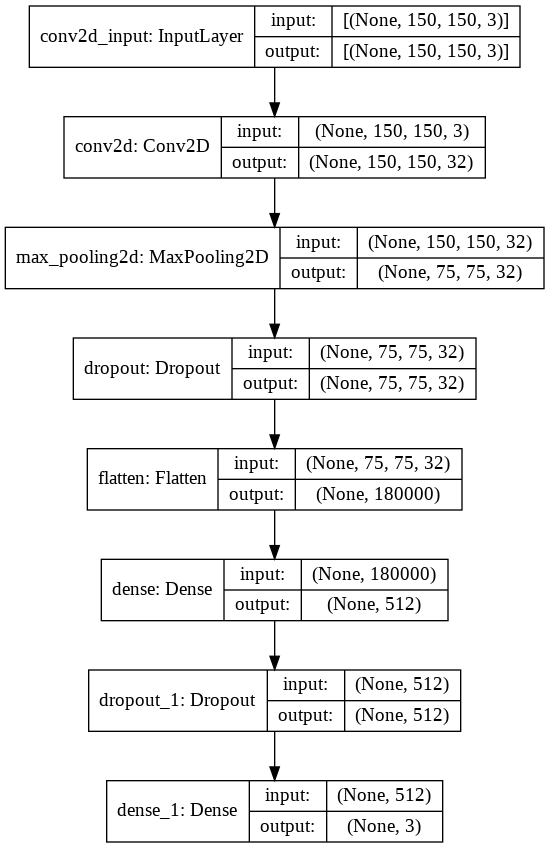

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ae.png', show_shapes=True)
# model.summary()

In [106]:
# #Apply transfer_model
# from tensorflow.keras.applications import VGG16
# transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# transfer_model.trainable = False

In [8]:
# transfer_model.summary()

In [9]:
#Set data
train_dir = './train'
validation_dir = './test'

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        classes = ['red','white','sparkling'],
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        classes = ['red','white','sparkling'],
        class_mode='categorical')


Found 1399 images belonging to 3 classes.
Found 389 images belonging to 3 classes.


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
TRAIN_BATCH_SIZE=20
VALIDATION_BATCH_SIZE=20

In [12]:
# 정확히 맞추지 않으면 계산 안 됨. 
steps_per_epochs = 1399//TRAIN_BATCH_SIZE
validation_steps = 389//VALIDATION_BATCH_SIZE

In [72]:
history = model.fit(train_generator, 
                     steps_per_epoch=steps_per_epochs,
                     validation_data=validation_generator, 
                     validation_steps=validation_steps,
                     epochs=5,
                             )

Epoch 1/5
 3/69 [>.............................] - ETA: 5s - loss: 6.4722e-04 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - 7s 104ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.2556 - val_accuracy: 0.9526
Epoch 2/5
69/69 [==============================] - 7s 102ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.2708 - val_accuracy: 0.9579
Epoch 3/5
69/69 [==============================] - 7s 102ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9474
Epoch 4/5
69/69 [==============================] - 7s 100ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2793 - val_accuracy: 0.9605
Epoch 5/5
69/69 [==============================] - 7s 101ms/step - loss: 5.1111e-04 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 0.9579


In [73]:
#model save
from keras.models import load_model
model.save('./model/my_model.h5')  # creates a HDF5 file 'my_model.h5'    
print('왜 코랩에서는 save가 안 될까')

왜 코랩에서는 save가 안 될까


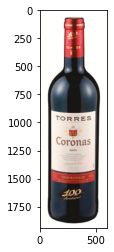

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
p_path = './prediction/test_red.jpg'
img = mpimg.imread(p_path)
imgplot = plt.imshow(img)
plt.show()

In [91]:
# 크기를 맞추고(resize)
import cv2
img = cv2.imread(p_path)
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

In [92]:
#predict classs
classes = model.predict(img) 
print(classes)
final_class = np.argmax(classes)
print(final_class)

[[0. 1. 0.]]
1


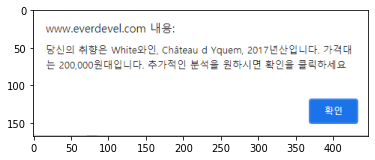

In [93]:
if final_class==0:
  rpath = 'Final_image/red_img.PNG'
  rimg = mpimg.imread(rpath)
  imgplot = plt.imshow(rimg)
elif final_class==1:
  wpath = 'Final_image/white_img.PNG'
  wimg = mpimg.imread(wpath)
  imgplot = plt.imshow(wimg)
elif final_class==2:
  fpath = 'Final_image/sparkling_img.PNG'
  fimg = mpimg.imread(fpath)
  imgplot = plt.imshow(fimg)

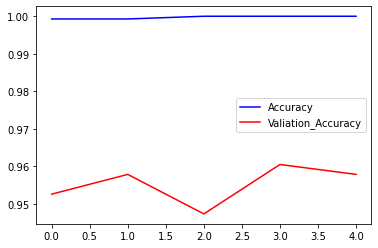

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label='Valiation_Accuracy',color='red')
plt.legend()
plt.savefig('save_acc.png')
plt.show()

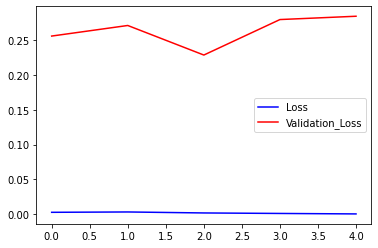

In [95]:
plt.plot(history.history['loss'], label='Loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation_Loss',color='red')
plt.legend()
plt.savefig('save_loss.png')
plt.show()

#Confusion matrix

In [96]:
# predictions = model.predict_generator(validation_generator, steps=validation_stepss, verbose=1)

# test_data = []
# test_labels = []
# batch_index = 0

# while batch_index <= validation_generator.batch_index:
#     data = next(validation_generator)
#     test_data.append(data[0])
#     test_labels.append(data[1])
#     batch_index = batch_index + 1

# test_data_array = np.asarray(test_data)
# test_labels_array = np.asarray(test_labels)

In [97]:
# print(test_data_array.shape)
# print(test_labels_array.shape)

In [98]:
# predictions.shape

In [99]:
# predictions = np.reshape(predictions,(380,3))
# predictions = np.reshape(predictions,(20,-1))
# test_data_array = np.reshape(predictions,(380,3))
# test_lables_array = np.reshape(predictions,(380,3))

In [100]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_labels, predictions)

In [105]:
print('15분마다')

15분마다
